# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

# Load Dataset

In [2]:
iris = pd.read_csv("Iris Dataset.csv")

In [3]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset modification acc. to given requirements

In [4]:
species = iris['Species']
dataset = iris.drop('Species', axis=1)

In [5]:
# Convert dataset to numpy array

data = np.array(dataset)

# Cluster centroids and assignments

In [6]:
# Randomly initialize cluster centroids
k=3
np.random.seed(42)
centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]

In [7]:
# Initialize cluster assignments and previous cluster centroids

cluster_assignments = np.zeros(len(data))
prev_centroids = np.zeros_like(centroids)

# K-means clustering

In [8]:
while not np.array_equal(centroids, prev_centroids):
    
    # Perform K-Means Clustering
    for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            cluster_assignments[i] = np.argmin(distances)
            
    # Update cluster centroids
    for j in range(k):
            cluster_points = data[cluster_assignments == j]
            centroids[j] = np.mean(cluster_points, axis=0)
        
    # Store previous cluster centroids
    prev_centroids = np.copy(centroids)

# Plotting the data for output and actual data

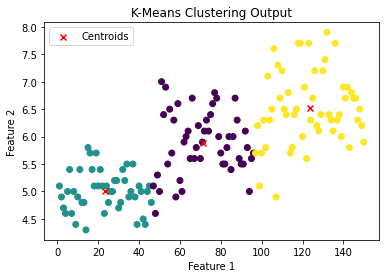

In [9]:
# Plot the output of the clustering
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Output')
plt.legend()
plt.show()

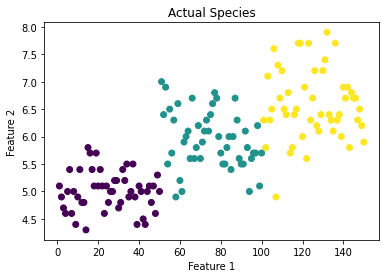

In [10]:
# Plot the actual species
plt.scatter(data[:, 0], data[:, 1], c=species.astype('category').cat.codes, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual Species')
plt.show()